In [1]:
import os
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#TEST
from sklearn.datasets import make_blobs

In [2]:
blobs,blob_labels = make_blobs(n_samples=1000, n_features=2, 
                                centers=6, random_state=1)


datasetPath = os.path.join(os.getcwd(),'wine-clustering.csv')
dataset = pd.read_csv(datasetPath)



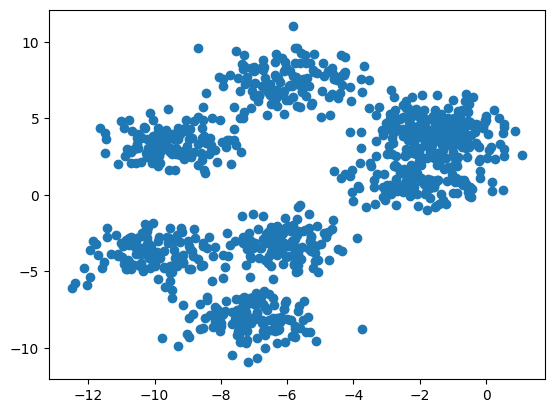

In [3]:

#TEST
dataset = blobs
plt.scatter(blobs[:, 0], blobs[:, 1])
plt.show()

In [4]:
possibleClusters = range(2, 8)
models = []
silhouetteScores = []

SILHOUETTE EVALUATION

In [5]:

for k in possibleClusters:
    
    model = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(dataset)

    models.append(model)
    
    silhouetteScores.append(silhouette_score(dataset, model.labels_, metric='euclidean'))

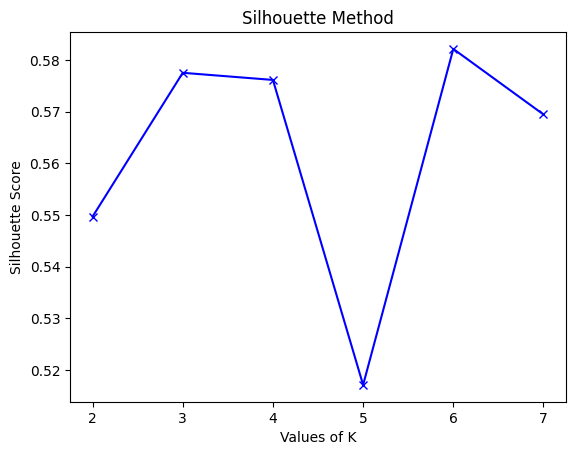

In [6]:
plt.plot(possibleClusters, silhouetteScores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

ELBOW EVALUATION:



Distortion = 1/n * Σ(distance(point, centroid)^2)

Inertia = Σ(distance(point, centroid)^2)


In [7]:
distortions = []
inertias = []
 
for k in possibleClusters:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(dataset)
 
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / dataset.shape[0])
    inertias.append(kmeanModel.inertia_)
 


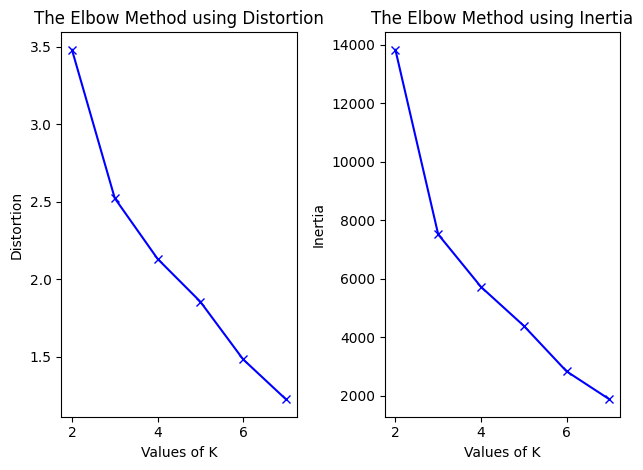

In [8]:
plt.subplot(1,2,1)
plt.plot(possibleClusters, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')


plt.subplot(1,2,2)
plt.plot(possibleClusters, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.fill()
plt.tight_layout()
plt.show()

FINAL PLOTTING

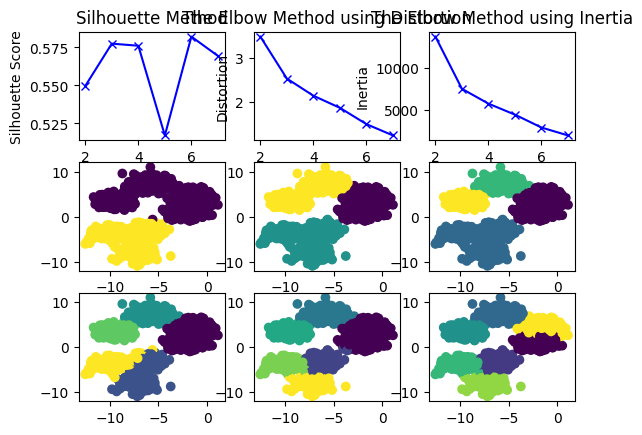

In [10]:
plt.subplot(3,3,1)
plt.plot(possibleClusters, silhouetteScores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.subplot(3,3,2)
plt.plot(possibleClusters, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')


plt.subplot(3,3,3)
plt.plot(possibleClusters, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.subplot(3,3,4)
plt.scatter(blobs[:, 0], blobs[:, 1],c=models[0].labels_)

plt.subplot(3,3,5)
plt.scatter(blobs[:, 0], blobs[:, 1],c=models[1].labels_)

plt.subplot(3,3,6)
plt.scatter(blobs[:, 0], blobs[:, 1],c=models[2].labels_)

plt.subplot(3,3,7)
plt.scatter(blobs[:, 0], blobs[:, 1],c=models[3].labels_)

plt.subplot(3,3,8)
plt.scatter(blobs[:, 0], blobs[:, 1],c=models[4].labels_)

plt.subplot(3,3,9)
plt.scatter(blobs[:, 0], blobs[:, 1],c=models[5].labels_)